<a href="https://colab.research.google.com/github/hanokjoshua144/Machine-Learning/blob/main/ml_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

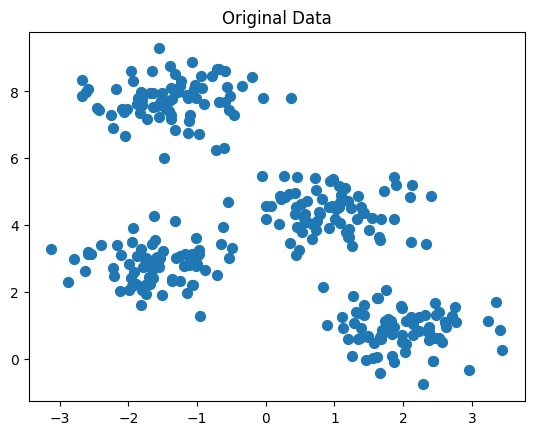

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic 2D data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot original data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original Data")
plt.show()


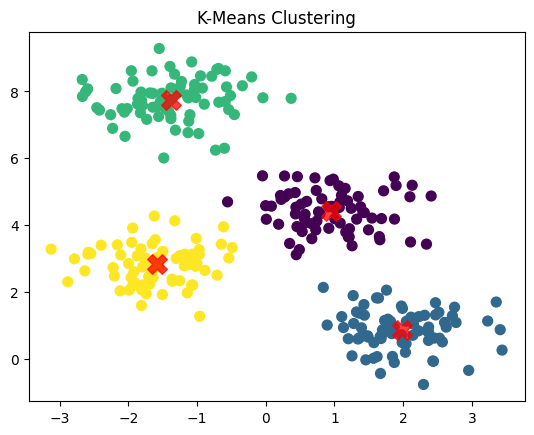

In [ ]:
from sklearn.cluster import KMeans

# Create and fit KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Predict cluster labels
y_kmeans = kmeans.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.show()


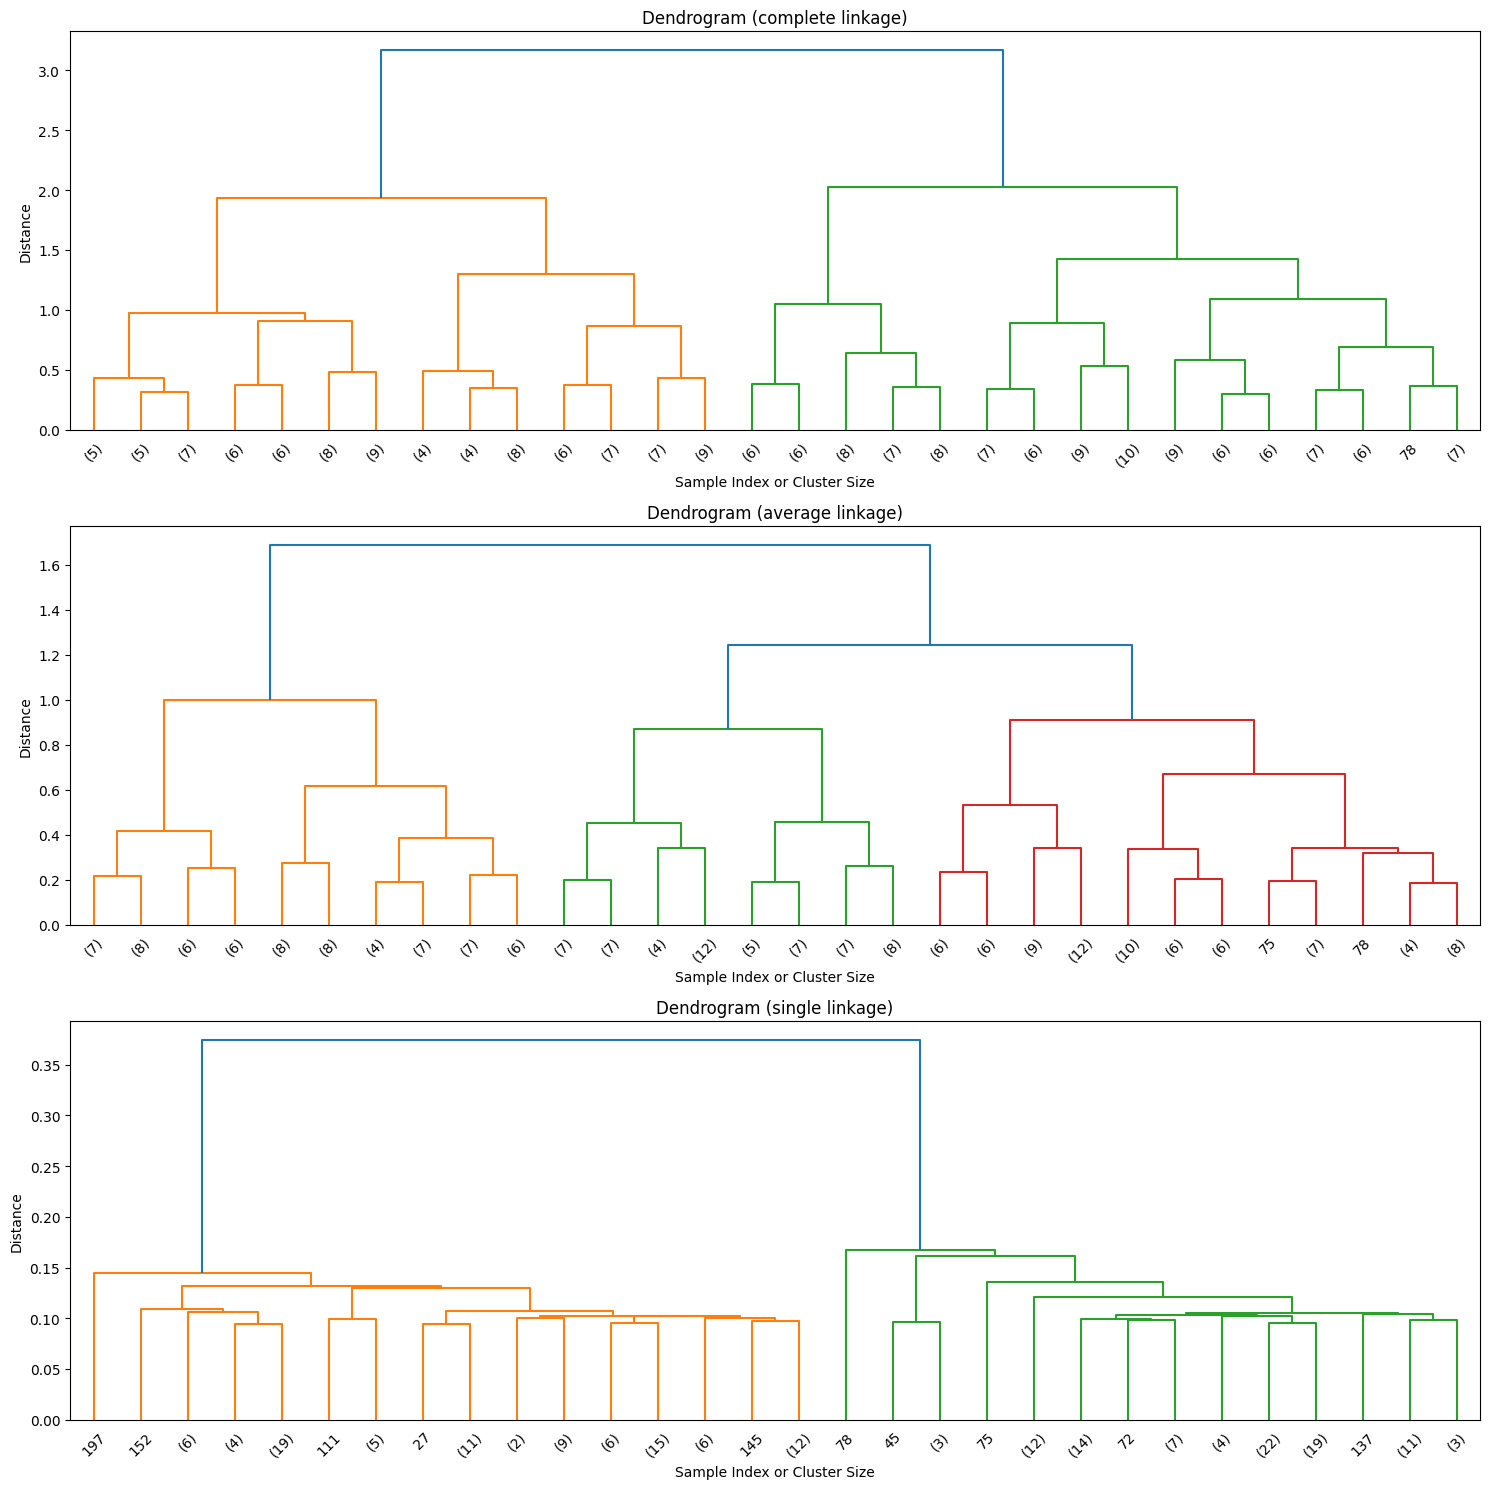

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming X is already defined from previous cells
# If not, uncomment the following lines to generate the data
# from sklearn.datasets import make_blobs
# X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


linkage_types = ['complete', 'average', 'single']

plt.figure(figsize=(15, 5 * len(linkage_types)))

for i, linkage_type in enumerate(linkage_types):
    # Compute linkage matrix
    linked = linkage(X, method=linkage_type)

    plt.subplot(len(linkage_types), 1, i + 1)
    dendrogram(linked, truncate_mode='lastp', p=30)
    plt.title(f"Dendrogram ({linkage_type} linkage)")
    plt.xlabel("Sample Index or Cluster Size")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()

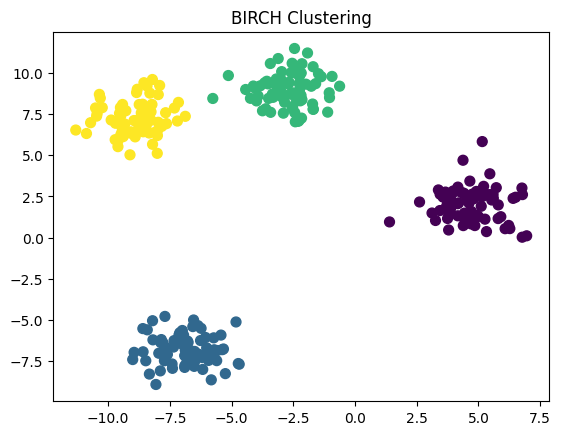

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Create synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply BIRCH
birch = Birch(n_clusters=4)
birch.fit(X)
y_birch = birch.predict(X)

# Plot BIRCH results
plt.scatter(X[:, 0], X[:, 1], c=y_birch, cmap='viridis', s=50)
plt.title("BIRCH Clustering")
plt.show()


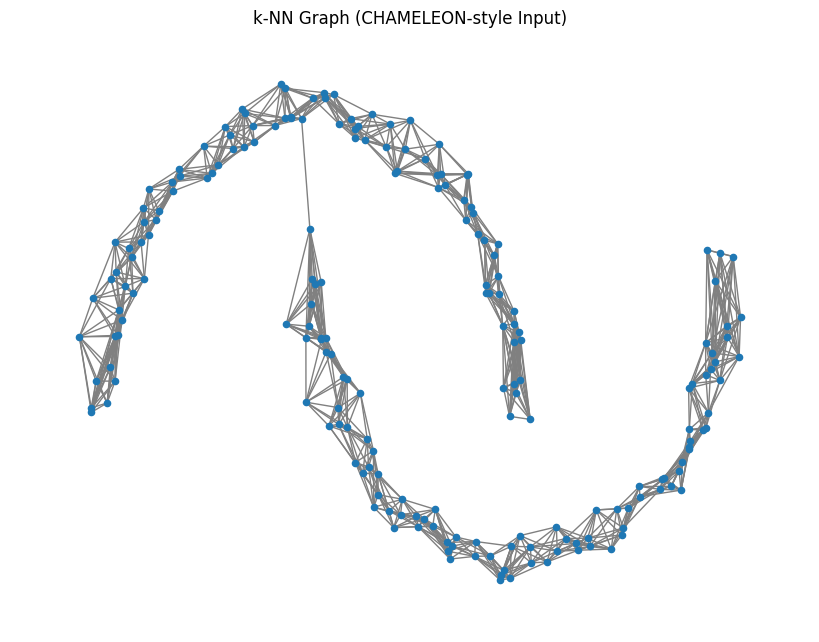

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
import networkx as nx

# Generate synthetic data
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Build k-NN graph
knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)
G = nx.from_scipy_sparse_array(knn_graph)

# Visualize graph structure
plt.figure(figsize=(8,6))
nx.draw(G, pos={i: X[i] for i in range(len(X))}, node_size=20, edge_color='gray')
plt.title("k-NN Graph (CHAMELEON-style Input)")
plt.show()

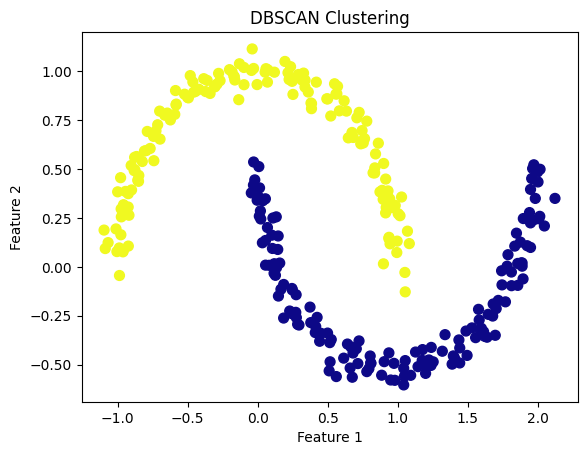

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Create a synthetic dataset
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from scipy.spatial.distance import euclidean
import numpy as np

a = np.array((1, 2, 3))
b = np.array((4, 5, 6))

dist_euclidean = euclidean(a, b)
print("Euclidean Distance:", dist_euclidean)

Euclidean Distance: 5.196152422706632


In [ ]:
from scipy.spatial.distance import cityblock

dist_manhattan = cityblock(a, b)
print("Manhattan Distance:", dist_manhattan)


Manhattan Distance: 9


In [ ]:
from scipy.spatial.distance import cosine

dist_cosine = cosine(a, b)
print("Cosine Distance:", dist_cosine)
print("Cosine Similarity:", 1 - dist_cosine)


Cosine Distance: 0.025368153802923787
Cosine Similarity: 0.9746318461970762


In [ ]:
from scipy.spatial.distance import minkowski

# Example with p=3
dist_minkowski = minkowski(a, b, p=3)
print("Minkowski Distance (p=3):", dist_minkowski)


Minkowski Distance (p=3): 4.3267487109222245


In [ ]:
from scipy.spatial.distance import jaccard

# Binary vectors (e.g., presence/absence)
a_bin = np.array([1, 0, 1, 1])
b_bin = np.array([1, 1, 0, 1])

dist_jaccard = jaccard(a_bin, b_bin)
print("Jaccard Distance:", dist_jaccard)
print("Jaccard Similarity:", 1 - dist_jaccard)


Jaccard Distance: 0.5
Jaccard Similarity: 0.5


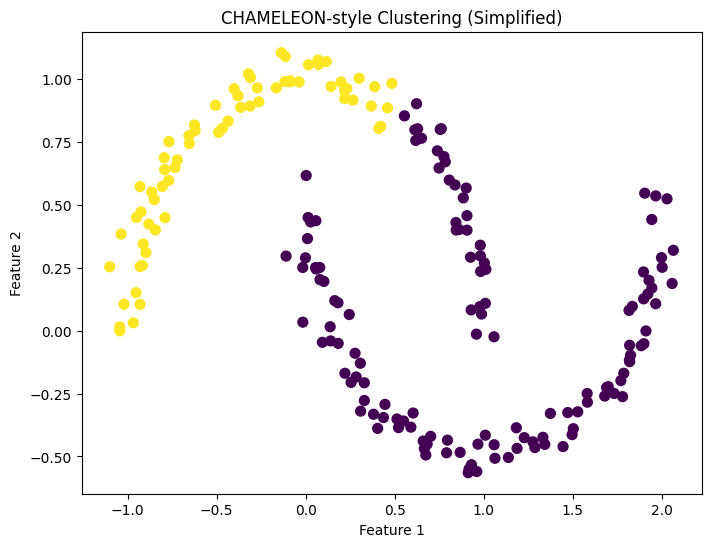

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Build k-NN graph
knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)
G = nx.from_scipy_sparse_array(knn_graph)


# Apply Agglomerative Clustering on the k-NN graph
# In a full CHAMELEON implementation, you'd use a more sophisticated graph partitioning and merging strategy.
# Here, we use Agglomerative Clustering as a simplified representation based on the graph structure.
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
y_chameleon = agg_clustering.fit_predict(X) # Use the original data for clustering

# Plot CHAMELEON results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_chameleon, cmap='viridis', s=50)
plt.title("CHAMELEON-style Clustering (Simplified)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

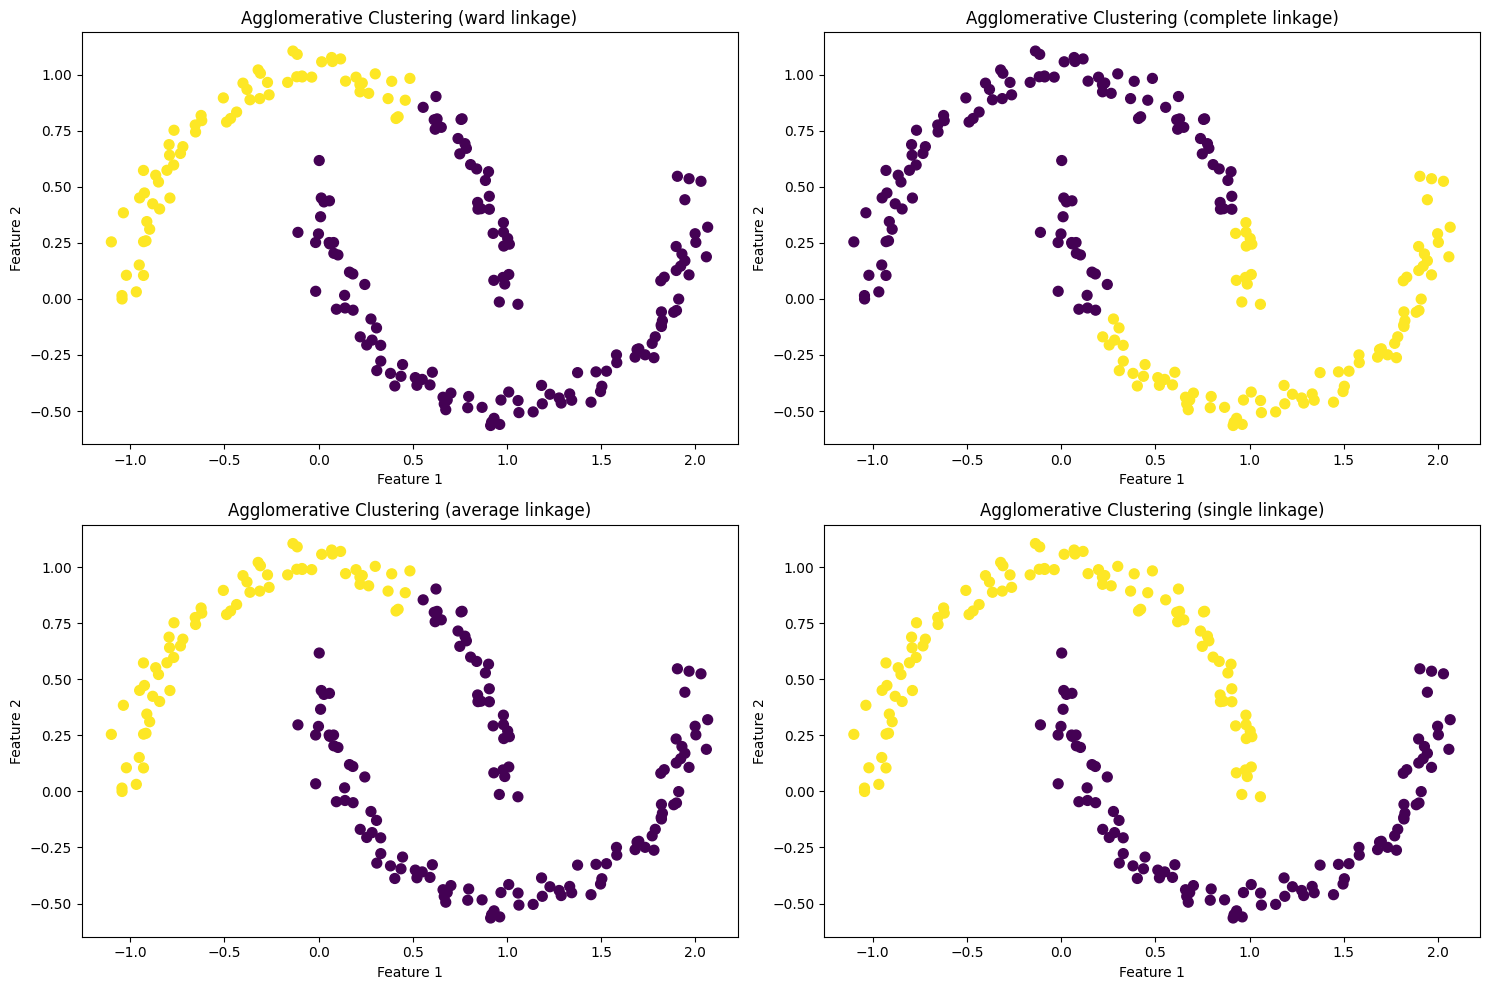

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming X is already defined from the previous cell
# If not, uncomment the following lines to generate the data
# from sklearn.datasets import make_moons
# X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)


linkage_types = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(15, 10))

for i, linkage_type in enumerate(linkage_types):
    agg_clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage_type)
    y_agg = agg_clustering.fit_predict(X)

    plt.subplot(2, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis', s=50)
    plt.title(f'Agglomerative Clustering ({linkage_type} linkage)')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()